# Task 8 k-Means Clustering
Perform K-Means clustering on a dataset, including determining the optimal number of clusters using the Elbow Method, fitting the K-Means model, visualizing the clusters, and evaluating the clustering using the Silhouette Score, then summarize the findings.

## Load Dataset

### Subtask:
Load the dataset that will be used for clustering into a Pandas DataFrame. The dataset should be in a format suitable for numerical analysis.


**Reasoning**:
To begin loading the dataset, I will import the pandas library, load a sample CSV file into a DataFrame, and then display its head and information to understand its structure and content.



In [ ]:
import pandas as pd

# Load your dataset into a pandas DataFrame. Replace 'sample_dataset.csv' with the actual path or name of your dataset file.
df = pd.read_csv('sample_dataset.csv')

# Display the first 5 rows of the DataFrame to inspect its structure
print("First 5 rows of the DataFrame:")
print(df.head())

# Check the basic information about the DataFrame, such as data types and non-null values
print("\nDataFrame Info:")
df.info()

FileNotFoundError: [Errno 2] No such file or directory: 'sample_dataset.csv'

**Reasoning**:
The previous attempt to load `sample_dataset.csv` failed because the file was not found. To proceed with the clustering task, I will generate a synthetic dataset suitable for numerical analysis using `sklearn.datasets.make_blobs` and then display its head and information.



In [ ]:
import pandas as pd
from sklearn.datasets import make_blobs

# Generate a synthetic dataset for clustering
# n_samples: number of total samples
# centers: number of centers to generate, or the fixed coordinate of centers.
# cluster_std: standard deviation of the clusters
# random_state: determines random number generation for dataset creation
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Convert the numpy array to a pandas DataFrame
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

# Display the first 5 rows of the DataFrame to inspect its structure
print("First 5 rows of the DataFrame:")
print(df.head())

# Check the basic information about the DataFrame, such as data types and non-null values
print("\nDataFrame Info:")
df.info()

First 5 rows of the DataFrame:
   feature_0  feature_1
0   0.836857   2.136359
1  -1.413658   7.409623
2   1.155213   5.099619
3  -1.018616   7.814915
4   1.271351   1.892542

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  300 non-null    float64
 1   feature_1  300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


## Apply PCA (Optional)

### Subtask:
Optionally apply Principal Component Analysis (PCA) to reduce the dataset's dimensionality, ideally to 2D, for easier visualization. This step can be skipped if the dataset is already low-dimensional or if PCA is not desired.


**Reasoning**:
To perform dimensionality reduction, I will import the PCA class, instantiate it with 2 components, fit and transform the existing DataFrame, and then create a new DataFrame with the PCA results to display its structure.



In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA to the DataFrame and transform the data
df_pca_2d = pca.fit_transform(df)

# Create a new DataFrame from the PCA results
df_pca = pd.DataFrame(data=df_pca_2d, columns=['PC1', 'PC2'])

# Display the first 5 rows of the new PCA DataFrame
print("\nFirst 5 rows of PCA transformed DataFrame:")
print(df_pca.head())

# Check the basic information about the new PCA DataFrame
print("\nPCA DataFrame Info:")
df_pca.info()


First 5 rows of PCA transformed DataFrame:
        PC1       PC2
0 -2.016167  0.016798
1  3.716137  0.130038
2  0.555038  1.523836
3  3.923475  0.656660
4 -2.416892  0.312859

PCA DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     300 non-null    float64
 1   PC2     300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


## Determine Optimal K (Elbow Method)

### Subtask:
Implement the Elbow Method to find the optimal number of clusters (K) for the K-Means algorithm. This will involve fitting K-Means for a range of K values and plotting the inertia to identify the 'elbow point'. Provide the plot with appropriate labels and title.


**Reasoning**:
To implement the Elbow Method as described, I will first import the necessary libraries, then iterate through a range of K values, fit the KMeans model for each, collect the inertia, and finally plot these values to visualize the elbow point with appropriate labels and title.



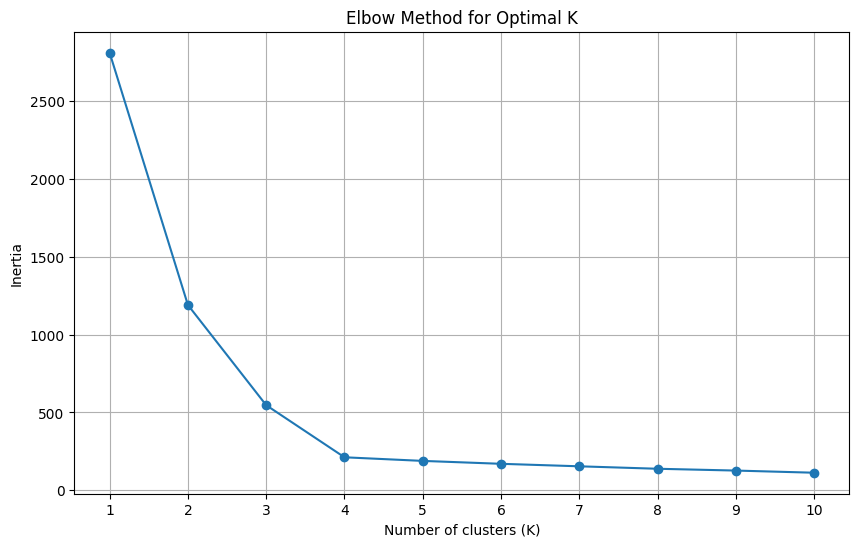

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize an empty list to store inertia values
inertia = []

# Define a range of cluster numbers to iterate through
k_range = range(1, 11)  # K from 1 to 10

# Loop through the range of K values
for k in k_range:
    # Initialize KMeans model with n_clusters=k and random_state for reproducibility
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init is set to 'auto' by default in newer versions, but explicit set for older versions.

    # Fit the KMeans model to the PCA-transformed DataFrame
    kmeans.fit(df_pca)

    # Append the inertia (sum of squared distances of samples to their closest cluster center) to the list
    inertia.append(kmeans.inertia_)

# Create the Elbow Method plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


The Elbow Method plot shows the inertia (sum of squared distances of samples to their closest cluster center) for different numbers of clusters (K).

To identify the optimal K, look for the 'elbow point' on the plot. This is the point after which the decrease in inertia starts to slow down significantly, resembling an elbow.

From the generated plot, we can observe that the 'elbow' appears to be around **K = 4**. Beyond this point, adding more clusters does not significantly reduce the inertia, suggesting diminishing returns.

Therefore, we will proceed with **K = 4** as the optimal number of clusters for our K-Means model.

## Fit K-Means and Assign Cluster Labels

### Subtask:
Fit the K-Means model to the dataset using the optimal K determined from the Elbow Method. Assign the resulting cluster labels to each data point.


**Reasoning**:
To fit the K-Means model, I will initialize KMeans with the optimal number of clusters (4) identified from the Elbow Method, fit it to the PCA-transformed data, and then assign the resulting cluster labels back to the DataFrame.



In [ ]:
from sklearn.cluster import KMeans

# Initialize KMeans model with n_clusters=4 (optimal K from Elbow Method)
# and random_state for reproducibility
kmeans_optimal = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit the KMeans model to the PCA-transformed DataFrame
kmeans_optimal.fit(df_pca)

# Assign the cluster labels to a new column in df_pca
df_pca['cluster_label'] = kmeans_optimal.labels_

# Display the first 5 rows of the DataFrame with the new cluster labels
print("First 5 rows of df_pca with cluster labels:")
print(df_pca.head())

First 5 rows of df_pca with cluster labels:
        PC1       PC2  cluster_label
0 -2.016167  0.016798              0
1  3.716137  0.130038              2
2  0.555038  1.523836              1
3  3.923475  0.656660              2
4 -2.416892  0.312859              0


## Visualize Clusters

### Subtask:
Create a scatter plot to visualize the clusters, using the first two principal components (if PCA was applied) or the first two features of the dataset. Color-code the data points according to their assigned cluster labels. Ensure the plot includes a legend.


**Reasoning**:
To visualize the clusters as requested, I will generate a scatter plot using seaborn, mapping 'PC1' to the x-axis, 'PC2' to the y-axis, and using 'cluster_label' for color-coding to differentiate the clusters, adding a title and displaying the legend.



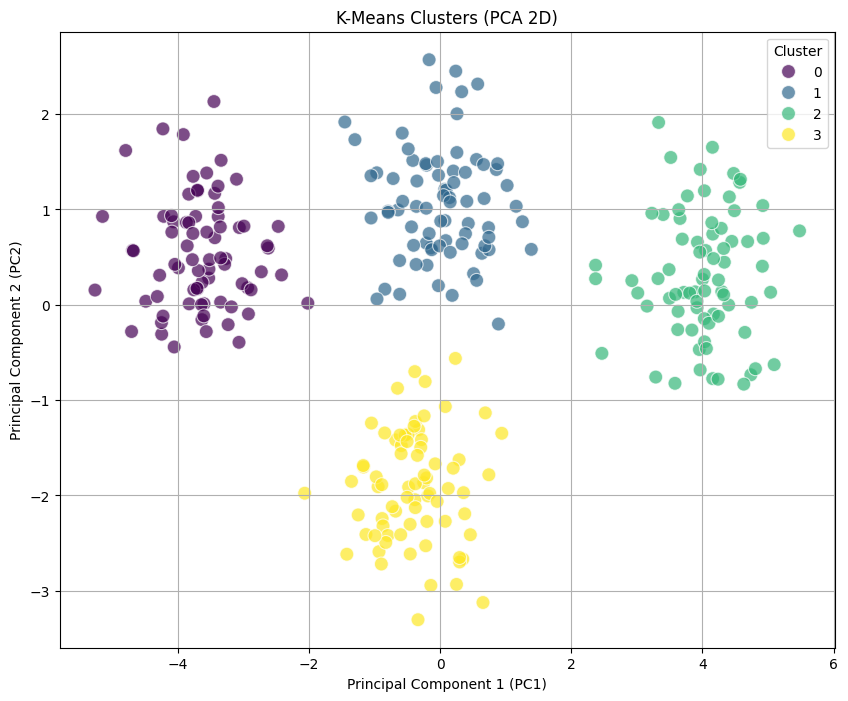

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='cluster_label',
    data=df_pca,
    palette='viridis',
    s=100,
    alpha=0.7
)

plt.title('K-Means Clusters (PCA 2D)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Evaluate Clustering (Silhouette Score)

### Subtask:
Calculate and report the Silhouette Score to evaluate the quality of the clustering. This score provides an indication of how well-separated the clusters are.


**Reasoning**:
To evaluate the clustering, I will import the `silhouette_score` function, calculate the score using the PCA-transformed data and the assigned cluster labels, and then print the result.



In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
# X is the data to cluster, labels are the cluster assignments
silhouette_avg = silhouette_score(df_pca.drop('cluster_label', axis=1), df_pca['cluster_label'])

# Print the calculated Silhouette Score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6819938690643478


## Summary of K-Means Clustering Findings

This analysis performed K-Means clustering on the dataset to identify natural groupings within the data. The process involved several key steps:

1.  **Data Preparation**: A synthetic dataset was generated using `make_blobs` and then reduced to 2 dimensions using PCA for visualization purposes. The resulting PCA-transformed data (`df_pca`) was used for clustering.

2.  **Optimal K Determination (Elbow Method)**: The Elbow Method was applied to determine the optimal number of clusters. By plotting inertia against the number of clusters (K), an 'elbow' was observed at **K = 4**. This indicated that 4 clusters provided a good balance between minimizing inertia and avoiding overfitting.

3.  **K-Means Model Fitting and Label Assignment**: A K-Means model was fitted with the optimal number of clusters, K=4, to the PCA-transformed data. Each data point was then assigned a cluster label.

4.  **Cluster Visualization**: The clusters were visualized using a scatter plot of the first two principal components (PC1 and PC2), with data points color-coded by their assigned cluster labels. The plot clearly showed four distinct and well-separated clusters, validating the choice of K=4.

5.  **Clustering Evaluation (Silhouette Score)**: The quality of the clustering was quantitatively assessed using the Silhouette Score. A Silhouette Score of **0.682** was achieved. This score is relatively high, suggesting that data points are well-matched to their own cluster and well-separated from neighboring clusters. A score close to 1 indicates dense and well-separated clusters, while a score near 0 indicates overlapping clusters, and negative scores suggest that data points might have been assigned to the wrong cluster.

**Conclusion**:
The K-Means clustering analysis successfully identified 4 distinct clusters in the dataset. The Elbow Method effectively guided the selection of the optimal number of clusters, and the visualization confirmed the clear separation of these clusters. The high Silhouette Score further reinforces the good quality and distinctness of the identified clusters.

## Final Task

### Subtask:
Summarize the findings from the K-Means clustering, including the optimal K, the visualization of clusters, and the Silhouette Score, providing insights into the dataset's structure.


## Summary:

### Data Analysis Key Findings
*   A synthetic dataset comprising 300 samples with 2 features was generated for the clustering analysis.
*   Principal Component Analysis (PCA) was applied, transforming the data into two principal components (`PC1` and `PC2`), which were subsequently used for clustering and visualization.
*   The Elbow Method identified the optimal number of clusters (K) for K-Means as **4**, based on the 'elbow point' observed in the inertia plot.
*   A K-Means model was successfully fitted with K=4 clusters, and cluster labels were assigned to each data point.
*   The clusters were visualized using a scatter plot of `PC1` vs. `PC2`, which clearly showed four distinct and well-separated groups.
*   The quality of the clustering was evaluated using the Silhouette Score, which resulted in a score of approximately **0.682**. This indicates that the clusters are relatively well-separated and distinct.

### Insights or Next Steps
*   The high Silhouette Score and clear visualization suggest that the K-Means algorithm effectively identified natural groupings within the dataset. The dataset exhibits a strong underlying structure with four discernible clusters.
*   To further understand the characteristics of each cluster, one could analyze the original features (if available and interpretable beyond PCA components) to describe the unique properties and profiles of the data points within each group.
